In [15]:
!pip install pillow
!pip install transformers
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install transformers torch accelerate sentencepiece
!pip install python-dotenv
!pip install groq

Looking in indexes: https://download.pytorch.org/whl/cpu


In [16]:
import os
from io import BytesIO
from IPython.display import display 
from PIL import Image
import base64
import requests
from transformers import pipeline
from transformers import AutoModelForCausalLM, AutoTokenizer
from dotenv import load_dotenv
from huggingface_hub import login
from groq import Groq

In [17]:
load_dotenv()

True

In [18]:
hf_var=os.getenv("HF_TOKEN")

In [19]:
login(hf_var)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [20]:
from transformers import pipeline 

get_completion = pipeline("image-to-text", model = "Salesforce/blip-image-captioning-base")


Device set to use cpu


In [21]:
image_path = "Cat03.jpg"  

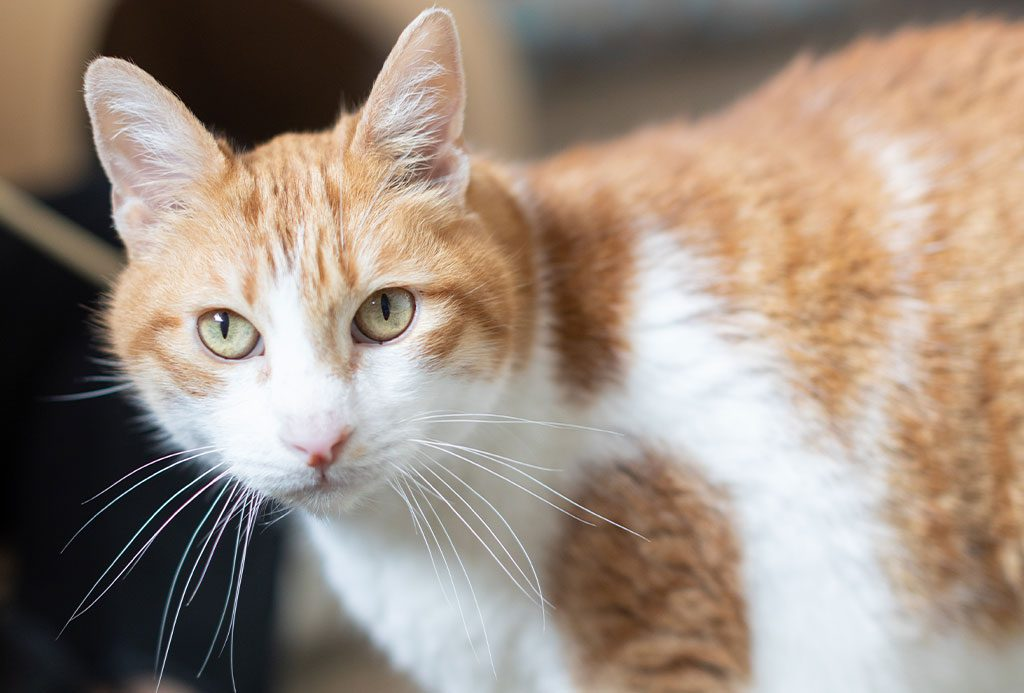

In [22]:
from PIL import Image
from IPython.display import display 

def show_image(image_path):
    image = Image.open(image_path)
    display(image) 
show_image(image_path)

In [23]:

def generate_completion(image_path):
    get_completion = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")
    
    # Abre la imagen
    image = Image.open(image_path)
    
    # Genera la descripci√≥n
    caption = get_completion(image)
    
    return caption[0]['generated_text']

image_path = "Cat03.jpg"  
description = generate_completion(image_path)

print("Descripci√≥n generada:", description)

Device set to use cpu


Descripci√≥n generada: a cat with a white face


In [24]:

# Obtener la API Key desde las variables de entorno
api_key = os.getenv("GROQ_API_KEY")

if not api_key:
    raise ValueError("‚ùå GROQ_API_KEY no est√° configurado en las variables de entorno.")

# Crear instancia del cliente Groq
client = Groq(api_key=api_key)

# Descripci√≥n de la imagen
description = "A mystical forest where glowing creatures roam under a violet sky."

if not description.strip():
    raise ValueError("‚ùå La descripci√≥n de la imagen est√° vac√≠a.")

# Generar la historia
chat_completion = client.chat.completions.create(
    model="llama-3.3-70b-versatile",
    messages=[
        {"role": "user", "content": f"Crea una historia con la siguiente descripci√≥n en espa√±ol en un solo parrafo corto: {description}"},
    ],
)

# Imprimir la historia generada
print("\nüìñ Historia Generada:\n")
print(chat_completion.choices[0].message.content)


üìñ Historia Generada:

En el coraz√≥n de un bosque m√°gico, criaturas luminosas de colores √≠ridescentes se desplazaban con gracia bajo un cielo violeta que parec√≠a pulsar con una energ√≠a c√≥smica. Los √°rboles, cubiertos de flores que brillaban como estrellas, se alzaban hacia el firmamento, creando un t√∫nel de luz que guiaba a los viajeros a trav√©s de la densa y exuberante vegetaci√≥n. Mientras caminaban, el suelo parec√≠a cantar con un suave murmullo, y el aire estaba lleno del dulce aroma de las flores, creando un ambiente de ensue√±o y misterio en este lugar donde la naturaleza y la magia se entrelazaban en armon√≠a perfecta.


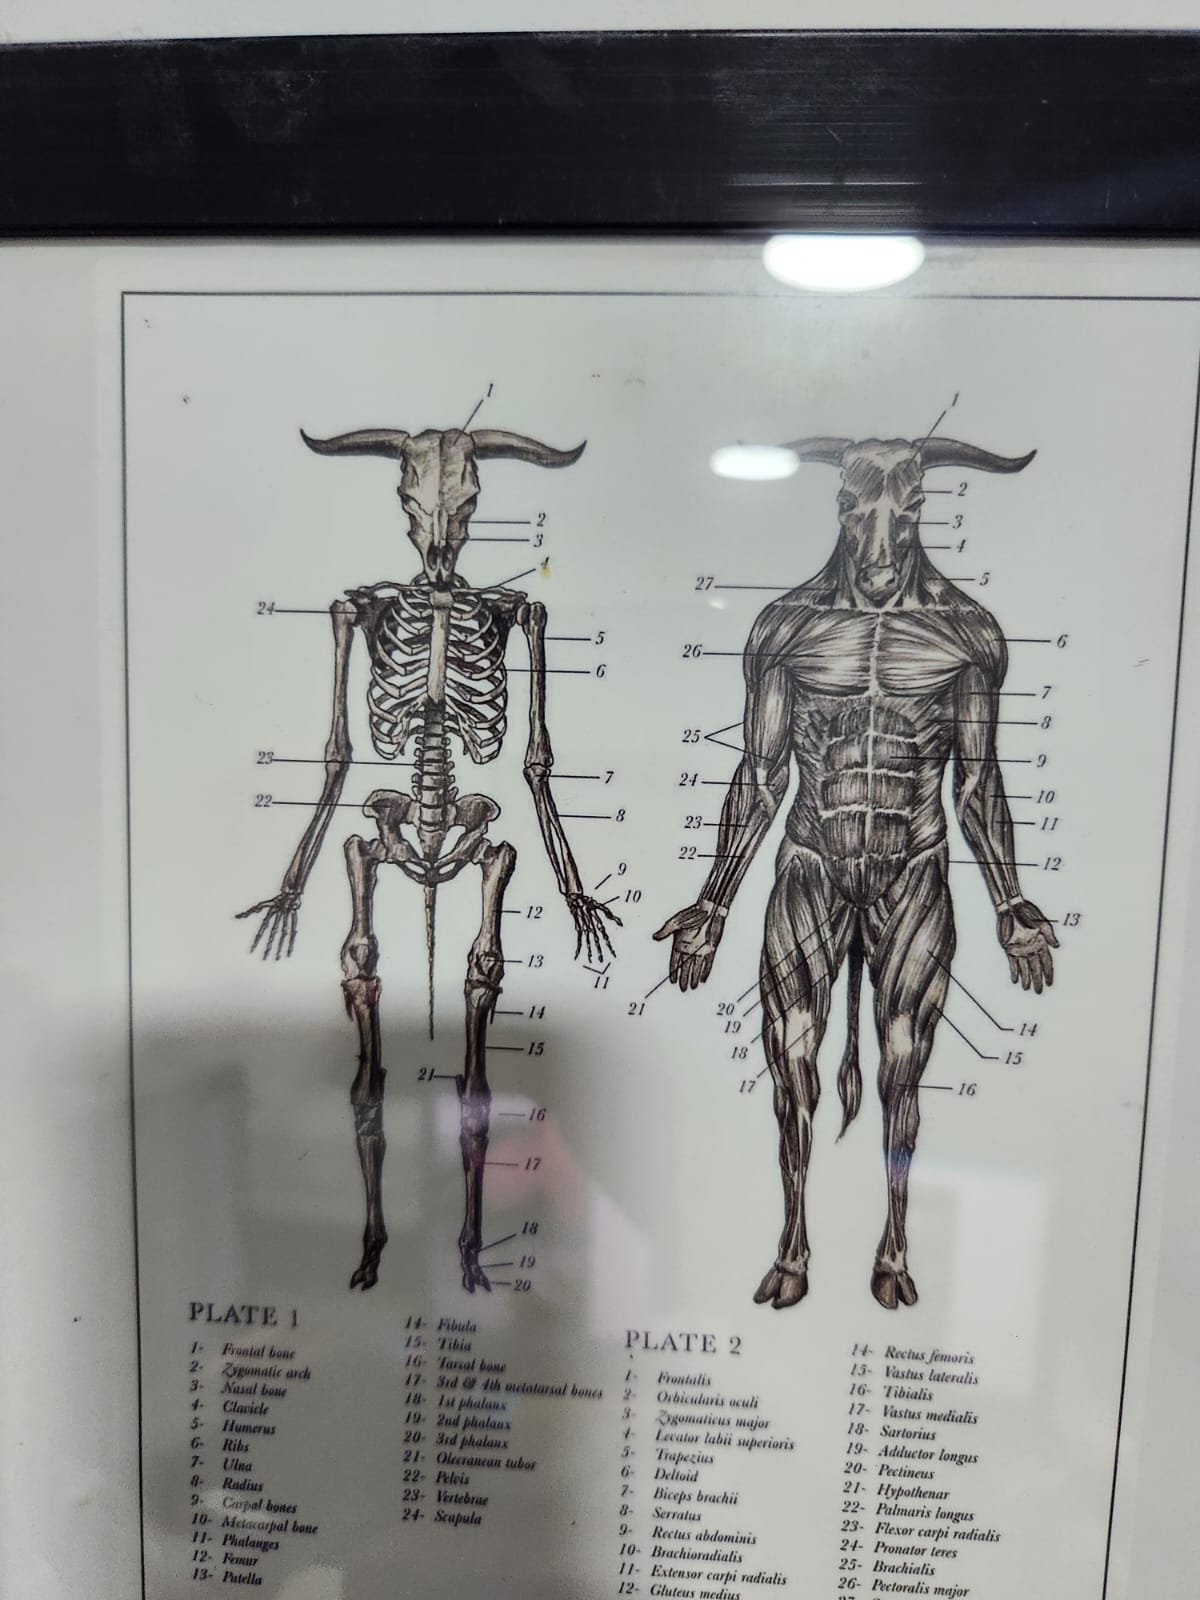

In [27]:
show_image("test_anatomy.jpeg")

In [28]:

image_path = "test_anatomy.jpeg" 
description = generate_completion(image_path)

print("Descripci√≥n generada:", description)

Device set to use cpu


Descripci√≥n generada: a framed picture of a goat and a goat skeleton
